In [1]:
import xarray as xr
import numpy as np
import scipy
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt

In [2]:
rf_daily1=xr.open_dataset("JJAS_rf.nc")
rf_daily1
datetimeindex = rf_daily1.indexes['time'].to_datetimeindex()
rf_daily1['time'] = datetimeindex

/tmp/ipykernel_8464/890299488.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = rf_daily1.indexes['time'].to_datetimeindex()


In [3]:
rf_daily1.rf

<xarray.DataArray 'rf' (time: 4880, z: 1, latitude: 129, longitude: 135)>
[84985200 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1982-06-01 1982-06-02 ... 2021-09-30
  * longitude  (longitude) float32 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * latitude   (latitude) float32 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
  * z          (z) float32 0.0
Attributes:
    long_name:  GRIDDED RAINFALL
    units:       
    source:     0.25 degr analyzed grids
    name:       rf
    title:      GRIDDED RAINFALL
    date:       01/01/01
    time:       00:00

In [10]:
rf_pattern=rf_daily1.rf[:,:,15:55,20:75].mean(dim=['z', 'latitude', 'longitude'])

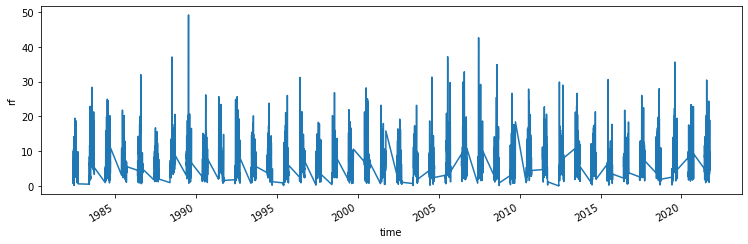

In [12]:
plt.rcParams["figure.figsize"] = [10.50, 3.50]
plt.rcParams["figure.autolayout"] = True
curve,=rf_pattern.plot()
ydata = curve.get_ydata()


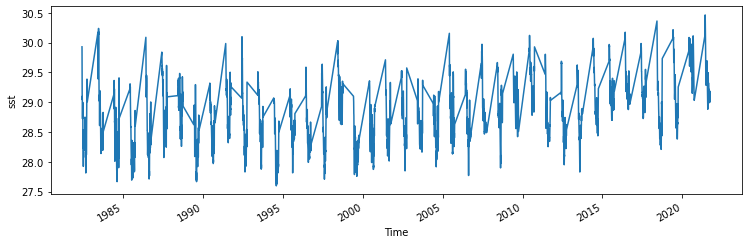

In [15]:
plt.rcParams["figure.figsize"] = [10.50, 3.50]
plt.rcParams["figure.autolayout"] = True
curve,=sst.plot()
y_data = curve.get_ydata()


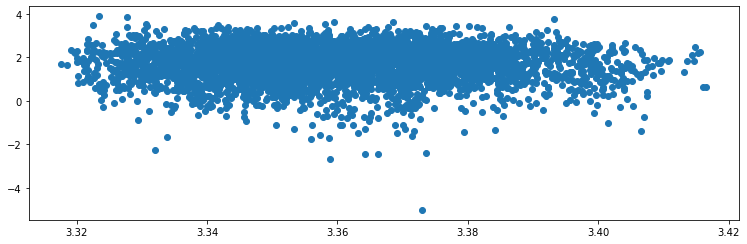

In [21]:
plt.scatter(np.log(y_data),np.log(ydata))

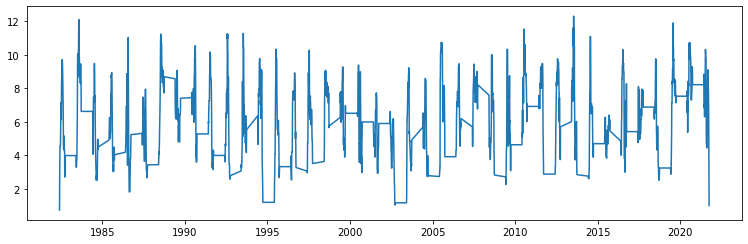

In [6]:
plt.rcParams["figure.figsize"] = [10.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(rf_pattern.time.data, scipy.signal.medfilt(rf_pattern,kernel_size=31))

In [20]:
log(1)

NameError: name 'log' is not defined

Extracting data from plot....
X data points for the plot is:  ['1982-06-01T00:00:00.000000000' '1982-06-02T00:00:00.000000000'
 '1982-06-03T00:00:00.000000000' ... '2021-09-28T00:00:00.000000000'
 '2021-09-29T00:00:00.000000000' '2021-09-30T00:00:00.000000000']
Y data points for the plot is:  [0.72460467 0.74821514 0.8689208  ... 2.0570323  1.9891951  0.9937591 ]


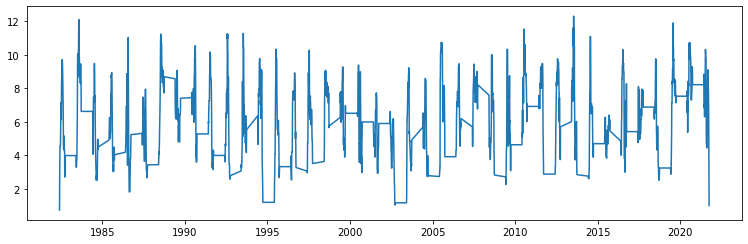

In [7]:

plt.rcParams["figure.figsize"] = [10.50, 3.50]
plt.rcParams["figure.autolayout"] = True

curve, = plt.plot(rf_pattern.time.data, scipy.signal.medfilt(rf_pattern,kernel_size=31))

print("Extracting data from plot....")
xdata = curve.get_xdata()
ydata = curve.get_ydata()
print("X data points for the plot is: ", xdata)
print("Y data points for the plot is: ", ydata)
plt.show()

In [8]:
time=rf_daily1.rf.time.data
rf_mean=xr.DataArray(np.array(ydata), coords=[time], dims=["time"])

In [14]:
sst_freq=xr.open_dataset("jjas40mean.nc")
sst=sst_freq.sst[:,40:90,120:].mean(dim=['lat','lon'])


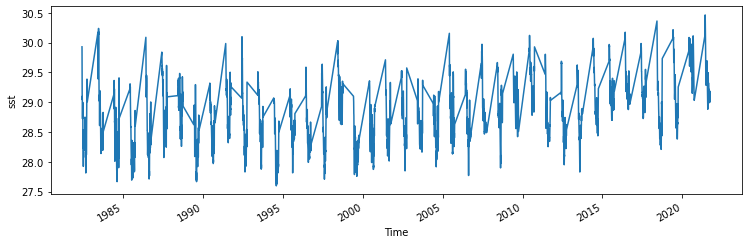

In [10]:
plt.rcParams["figure.figsize"] = [10.50, 3.50]
plt.rcParams["figure.autolayout"] = True
sst.plot()

Extracting data from plot....
X data points for the plot is:  ['1982-06-01T00:00:00.000000000' '1982-06-02T00:00:00.000000000'
 '1982-06-03T00:00:00.000000000' ... '2021-09-28T00:00:00.000000000'
 '2021-09-29T00:00:00.000000000' '2021-09-30T00:00:00.000000000']
Y data points for the plot is:  [28.721275 28.735455 28.787992 ... 29.005774 29.005774 29.00374 ]


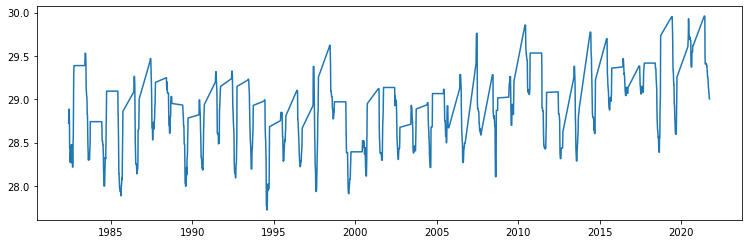

In [11]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10.50, 3.50]
plt.rcParams["figure.autolayout"] = True

curve, = plt.plot(sst.time.data, scipy.signal.medfilt(sst,kernel_size=31))

print("Extracting data from plot....")
xdata = curve.get_xdata()
ydata = curve.get_ydata()
print("X data points for the plot is: ", xdata)
print("Y data points for the plot is: ", ydata)
plt.show()

In [12]:
scipy.signal.boxcar(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [13]:
sst.data[1]

29.88894

In [14]:
time=rf_daily1.rf.time.data
sst_mean=xr.DataArray(np.array(ydata), coords=[time], dims=["time"])

In [15]:
xr.corr(sst_mean,rf_mean)

<xarray.DataArray ()>
array(-0.02814056)